In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-colorblind')
%matplotlib inline

In [28]:
#The file is stored locally
df = pd.read_csv('/Users/stevalang/Galvanize/0002_capstones/capstone1/accept_reject_bank_offer/data/bank-full.csv', delimiter=';')

In [29]:
# look at the first five rows of the bank-full.csv file.
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [7]:
# Rotate the columns to rows for more visibility of the features
df.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [8]:
df.shape

(41188, 21)

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
# Check the uniques values of every column
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('----'*20)

age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
--------------------------------------------------------------------------------
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
--------------------------------------------------------------------------------
marital
['married' 'single' 'divorced' 'unknown']
--------------------------------------------------------------------------------
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
--------------------------------------------------------------------------------
default
['no' 'unknown' 'yes']
-------------------------------------------------------------------------

In [14]:
# List of non numeric columns
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [15]:
# Categorical Variables:
category_cols = list(df.select_dtypes(include=['object']))
category_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

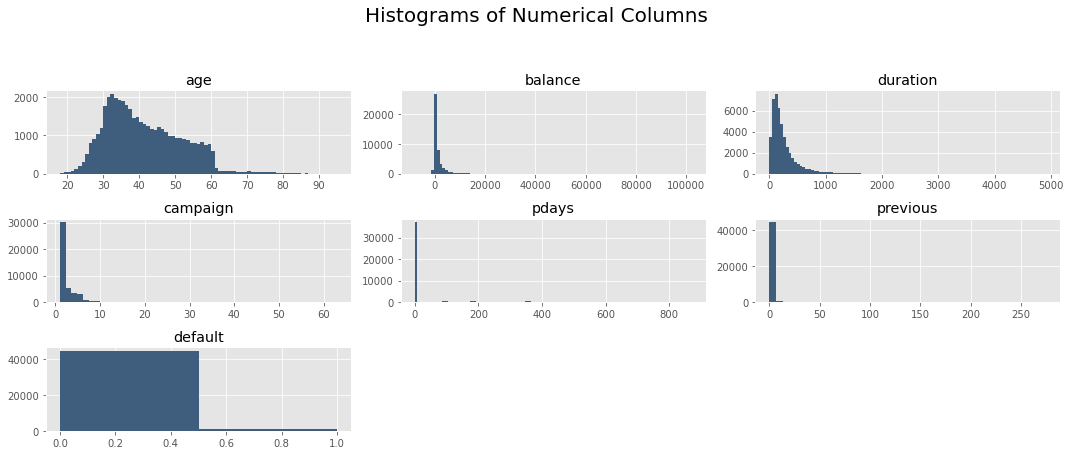

In [31]:
X = df.drop(['y','job','marital', 'education', 'contact', 
             'housing', 'loan', 'day', 'month', 'poutcome' ], axis=1)
y = df['y']

X = pd.get_dummies(X)
y = pd.get_dummies(y)

X.columns
X = X.drop(['default_no'], axis= 1)
X = X.rename(columns = {'default_yes': 'default'})
y.columns
y = y.drop(['yes'], axis=1)
y = y.rename(columns= {'no': 'y'})

df2 = X
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df2.columns.values[i])

    vals = np.size(df2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(df2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('hist_num_cols.png')



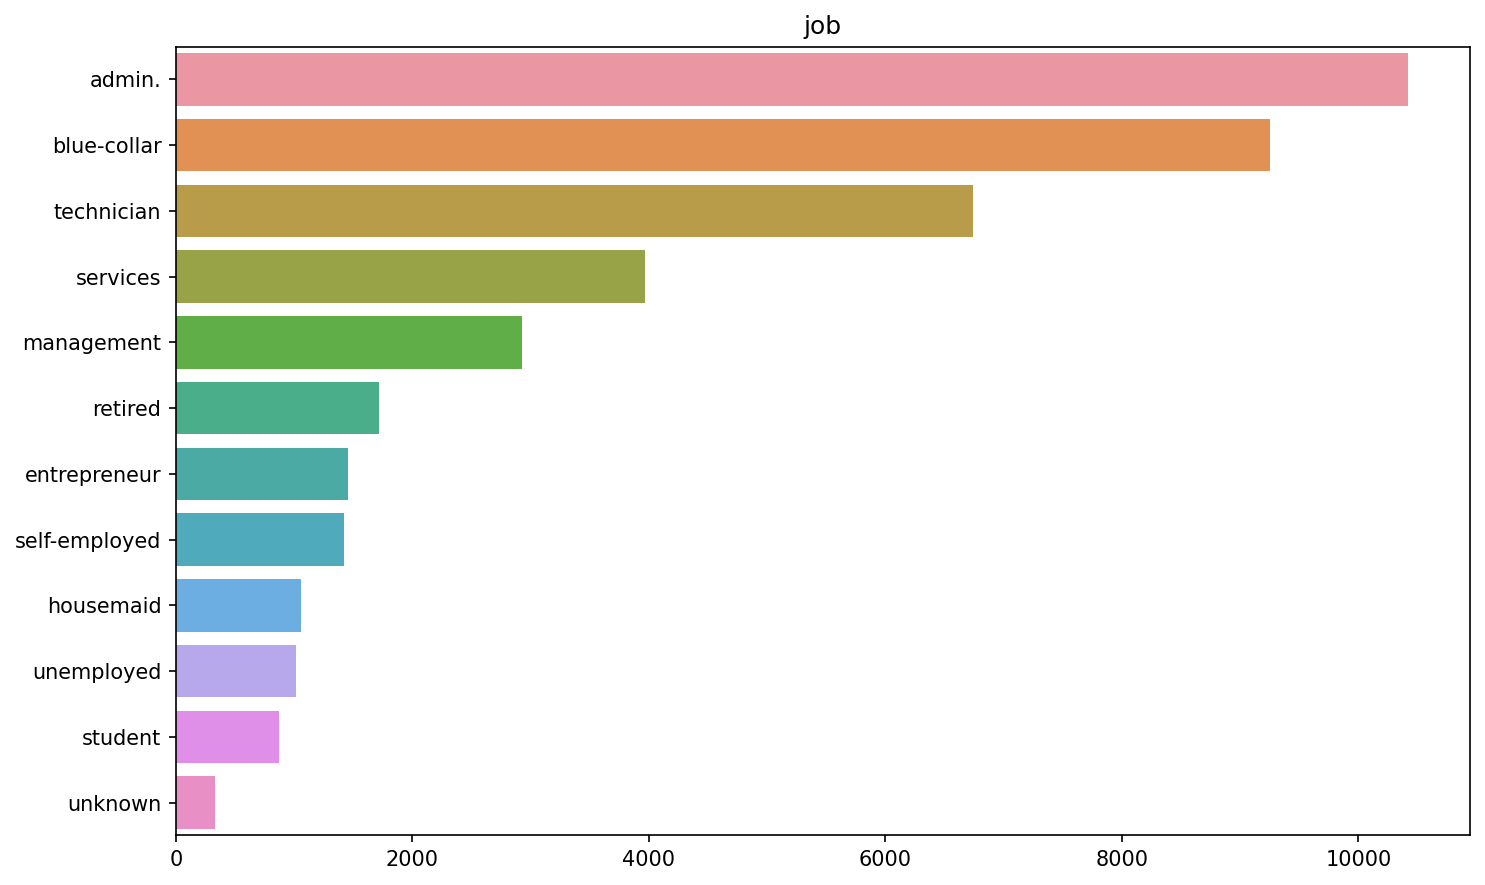

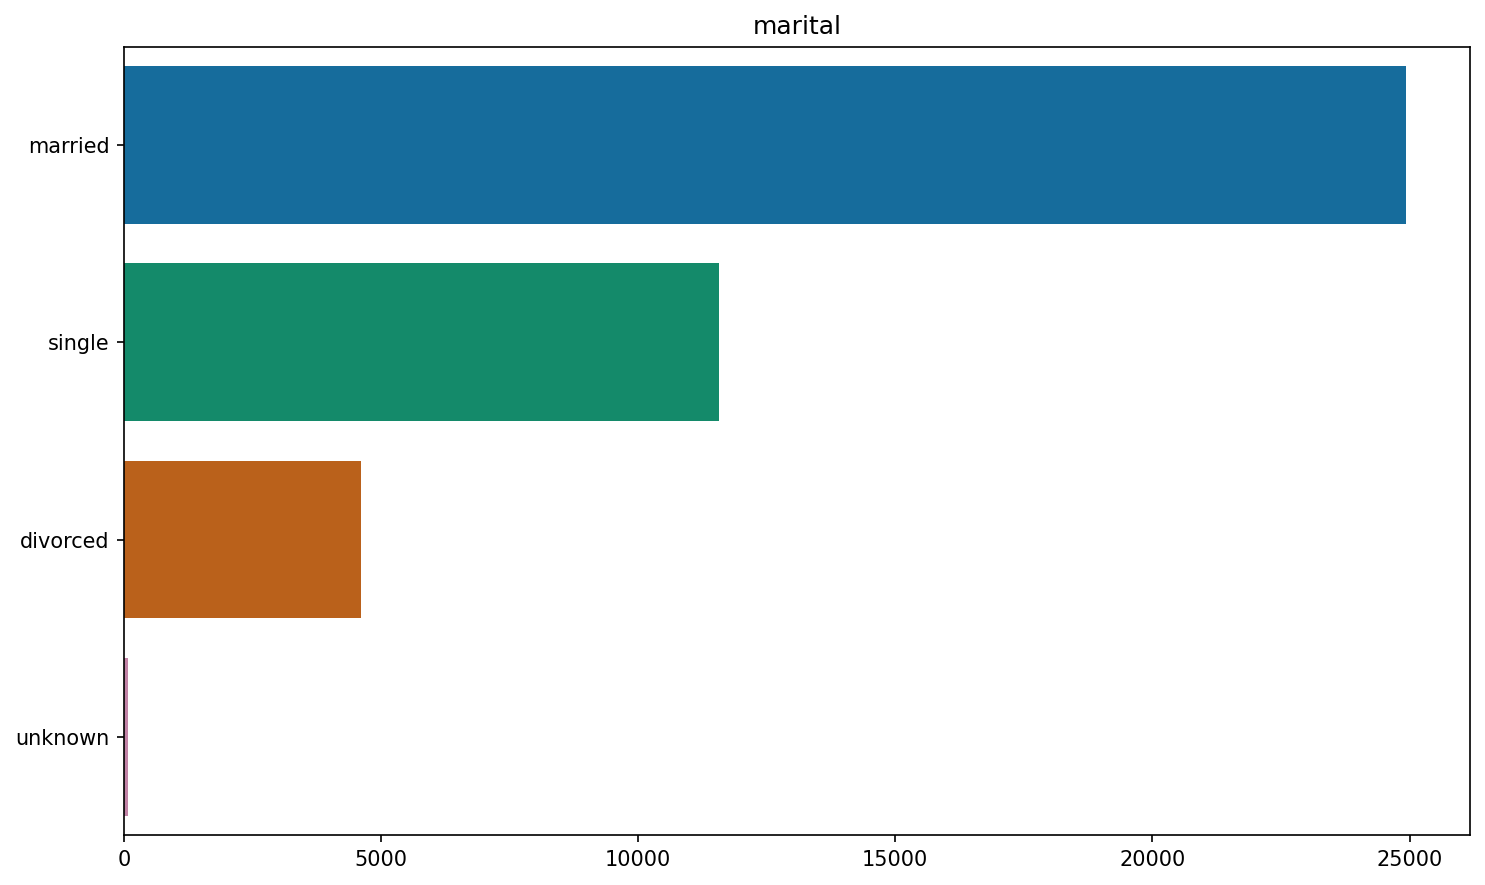

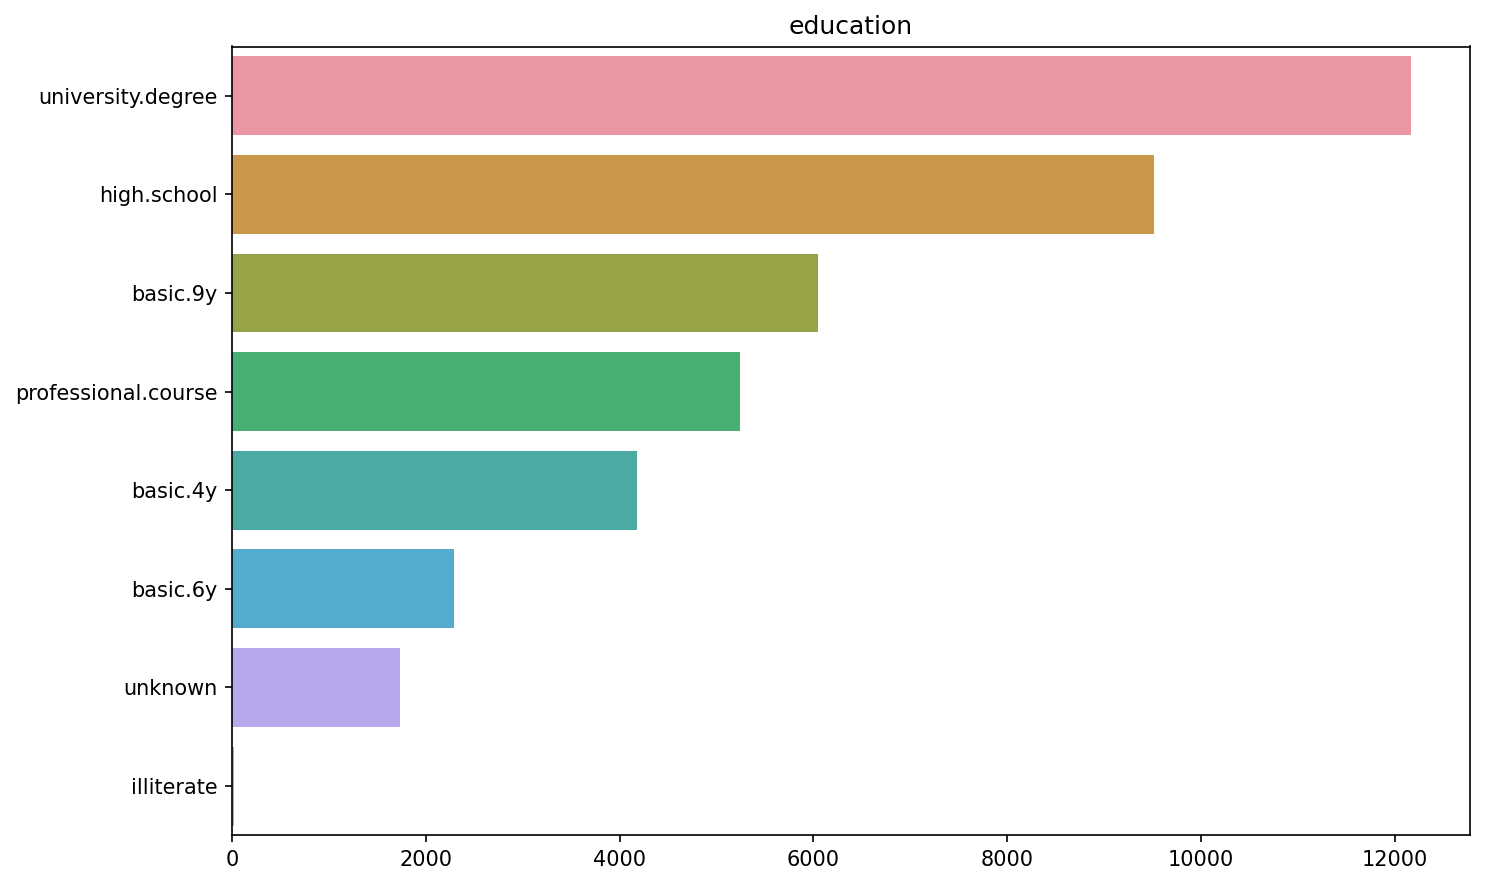

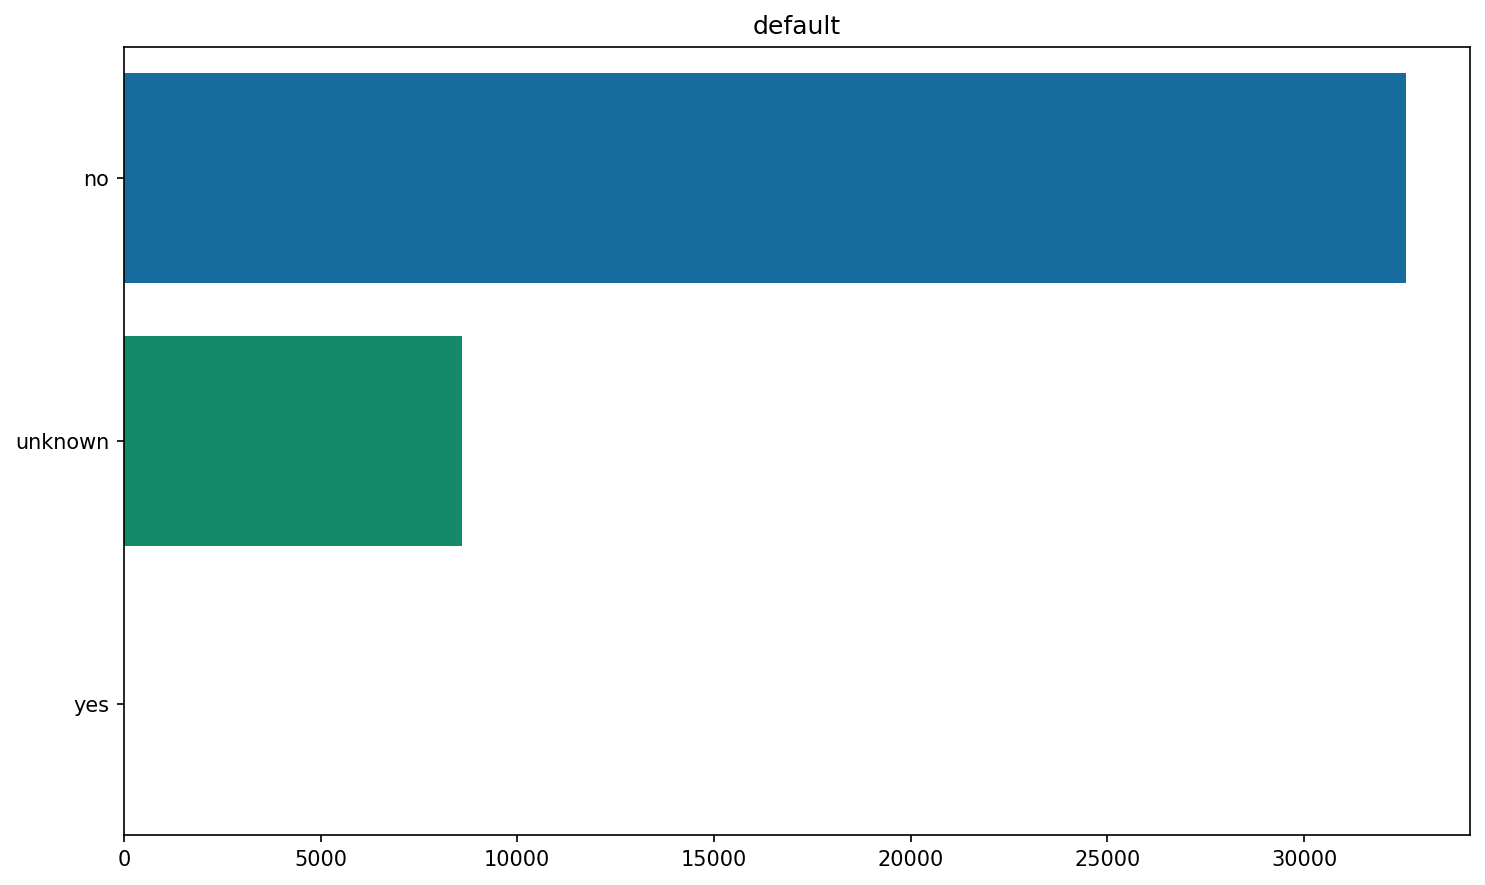

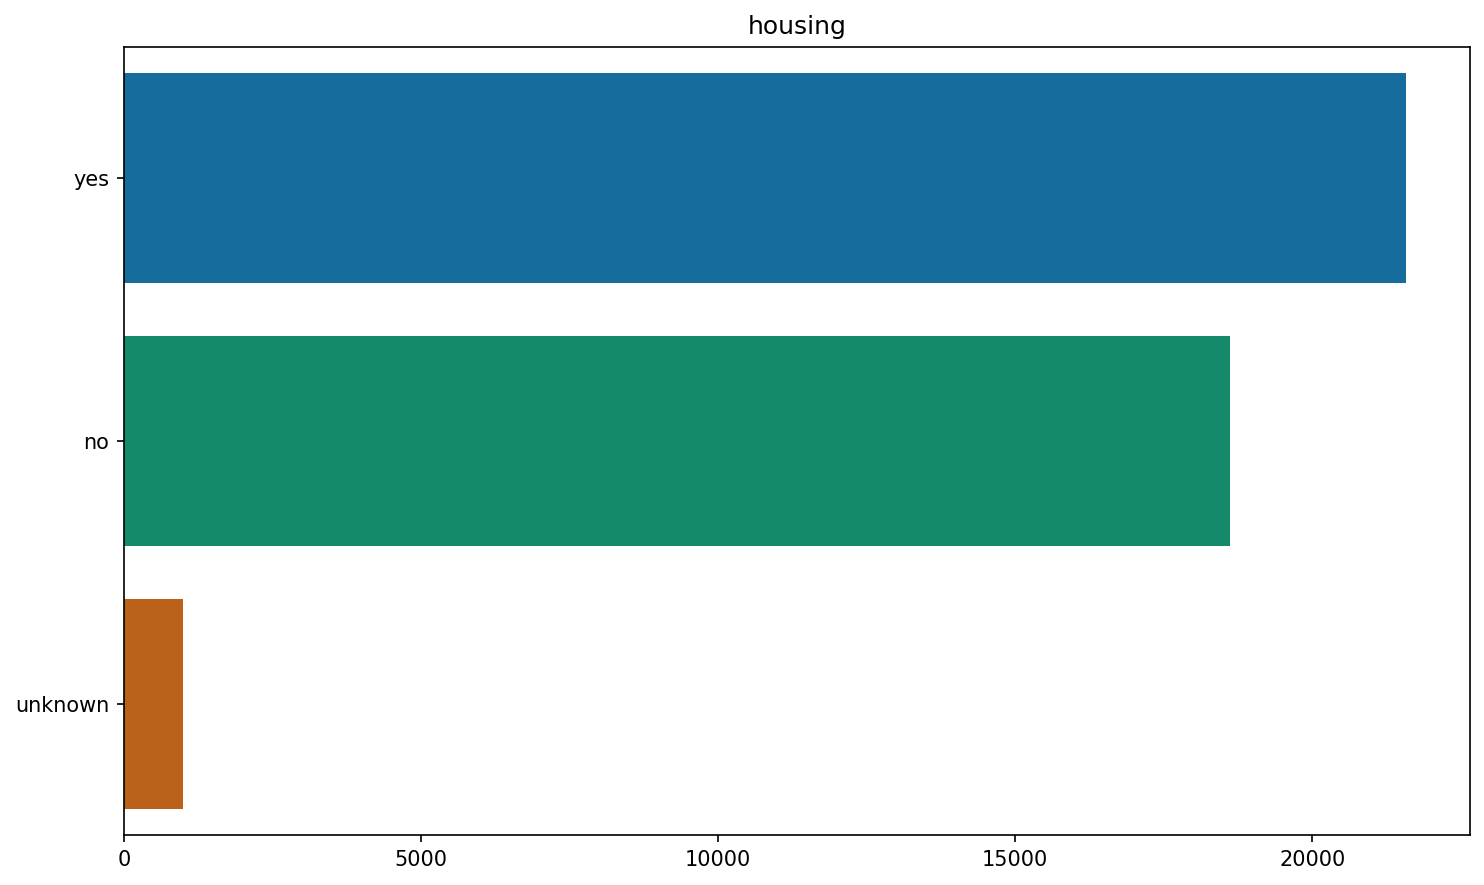

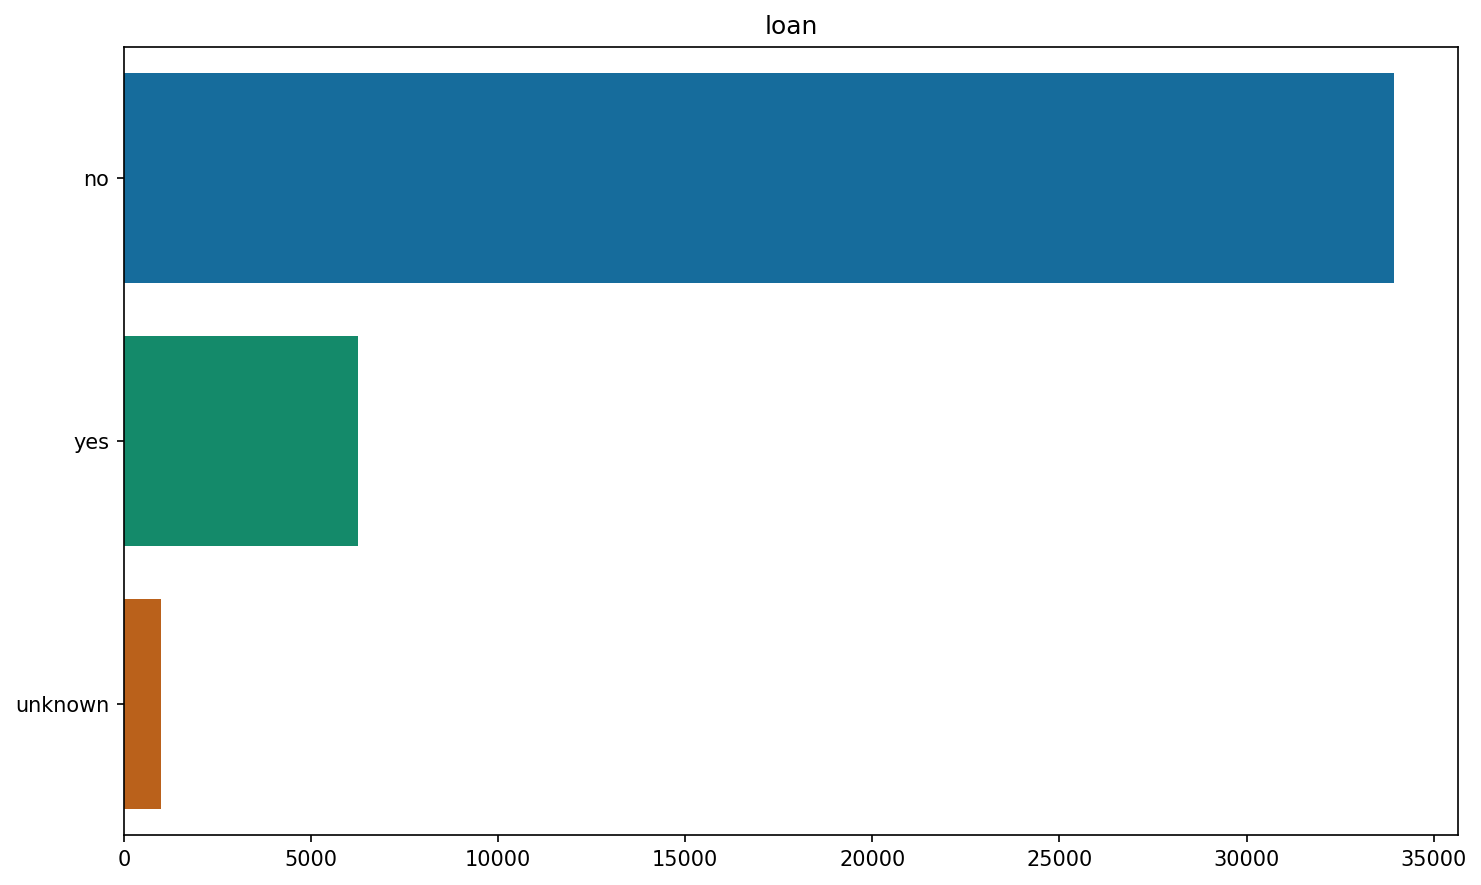

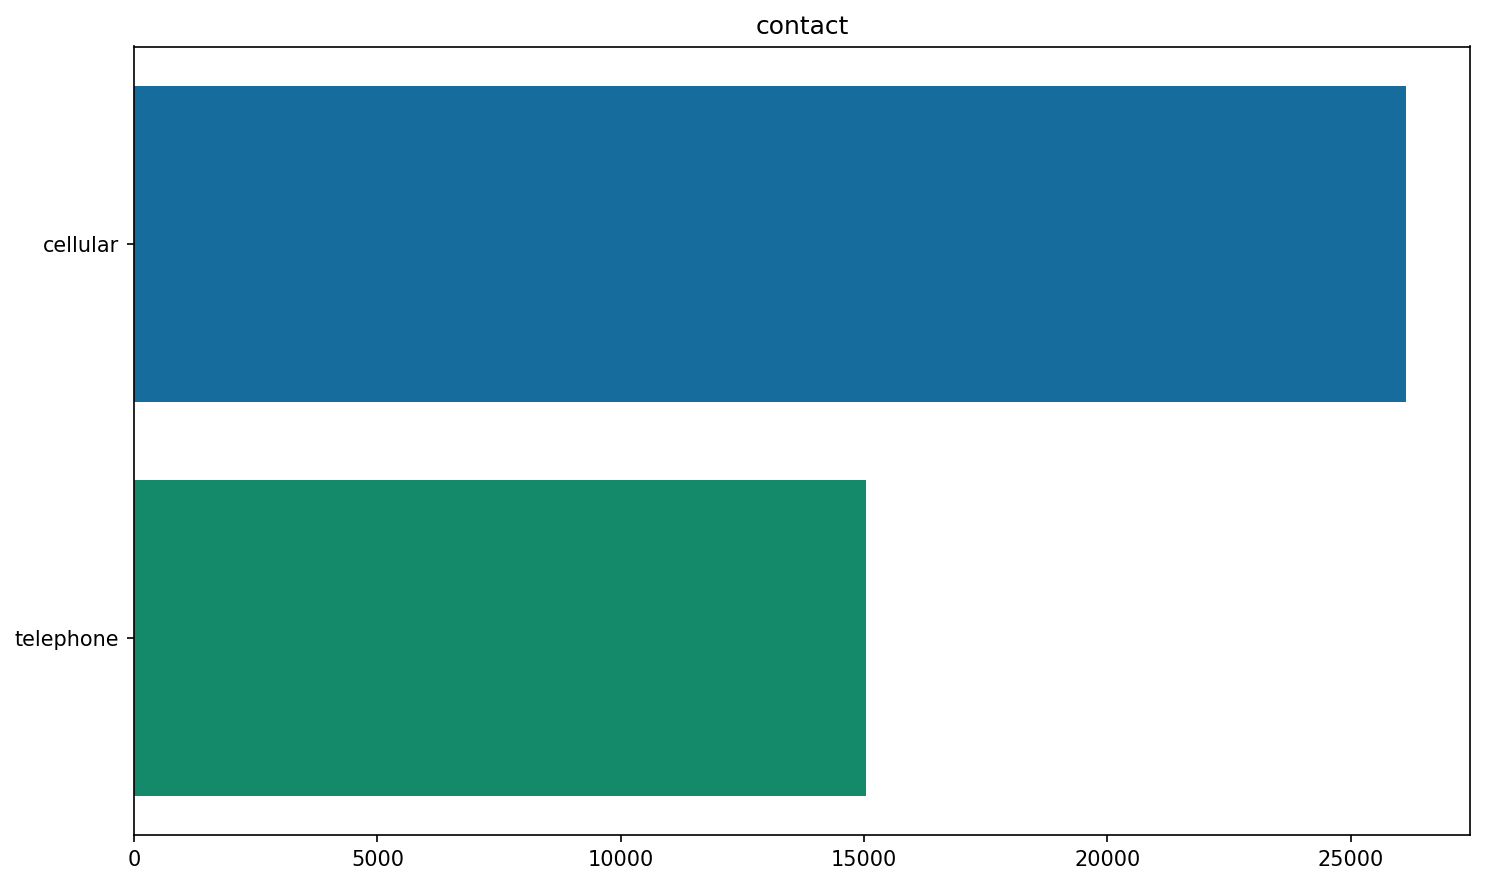

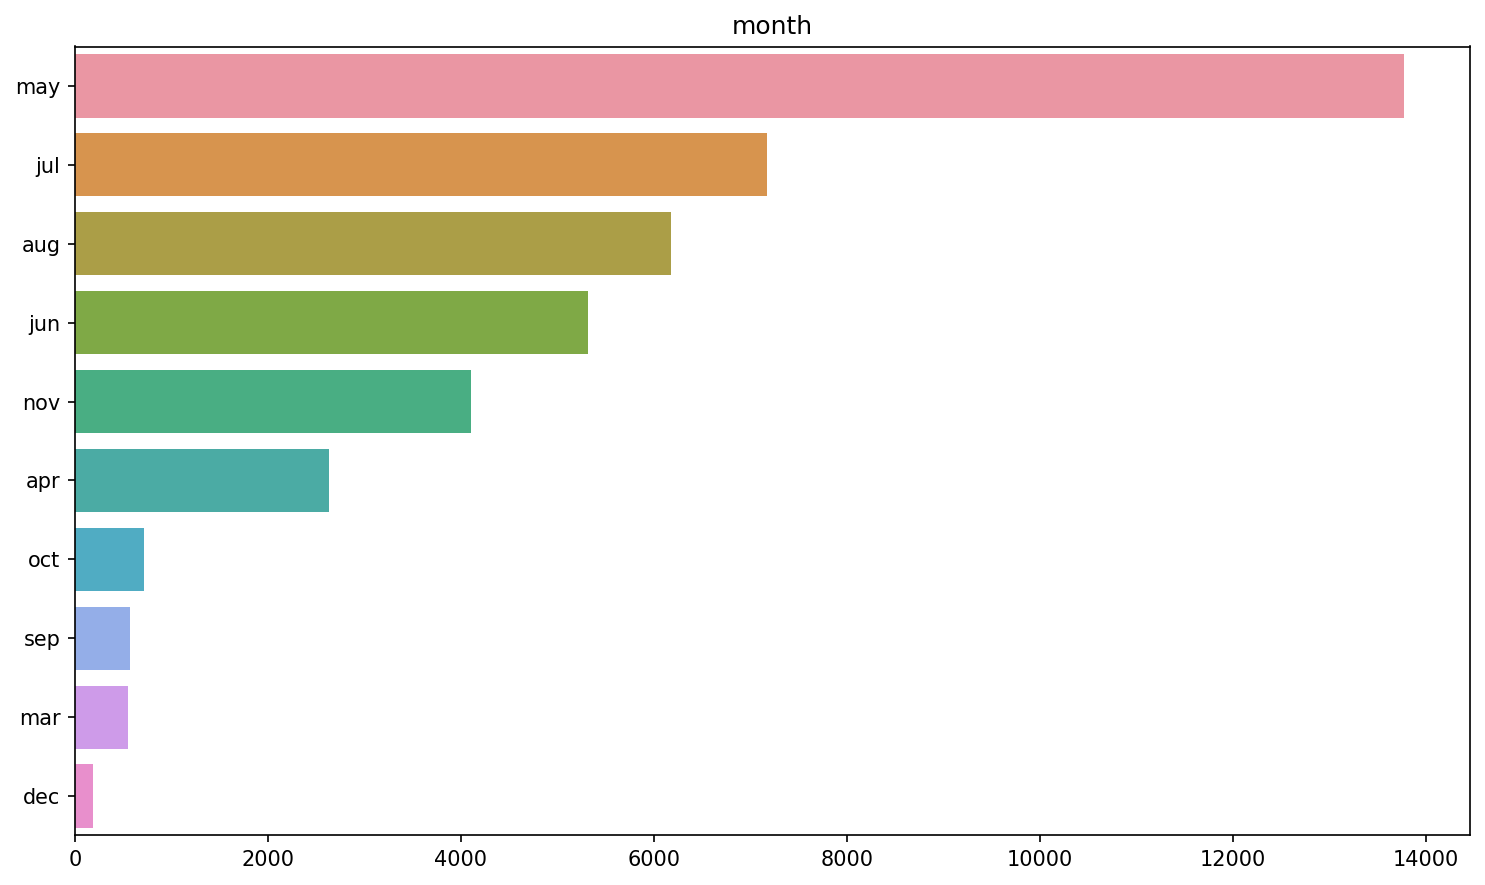

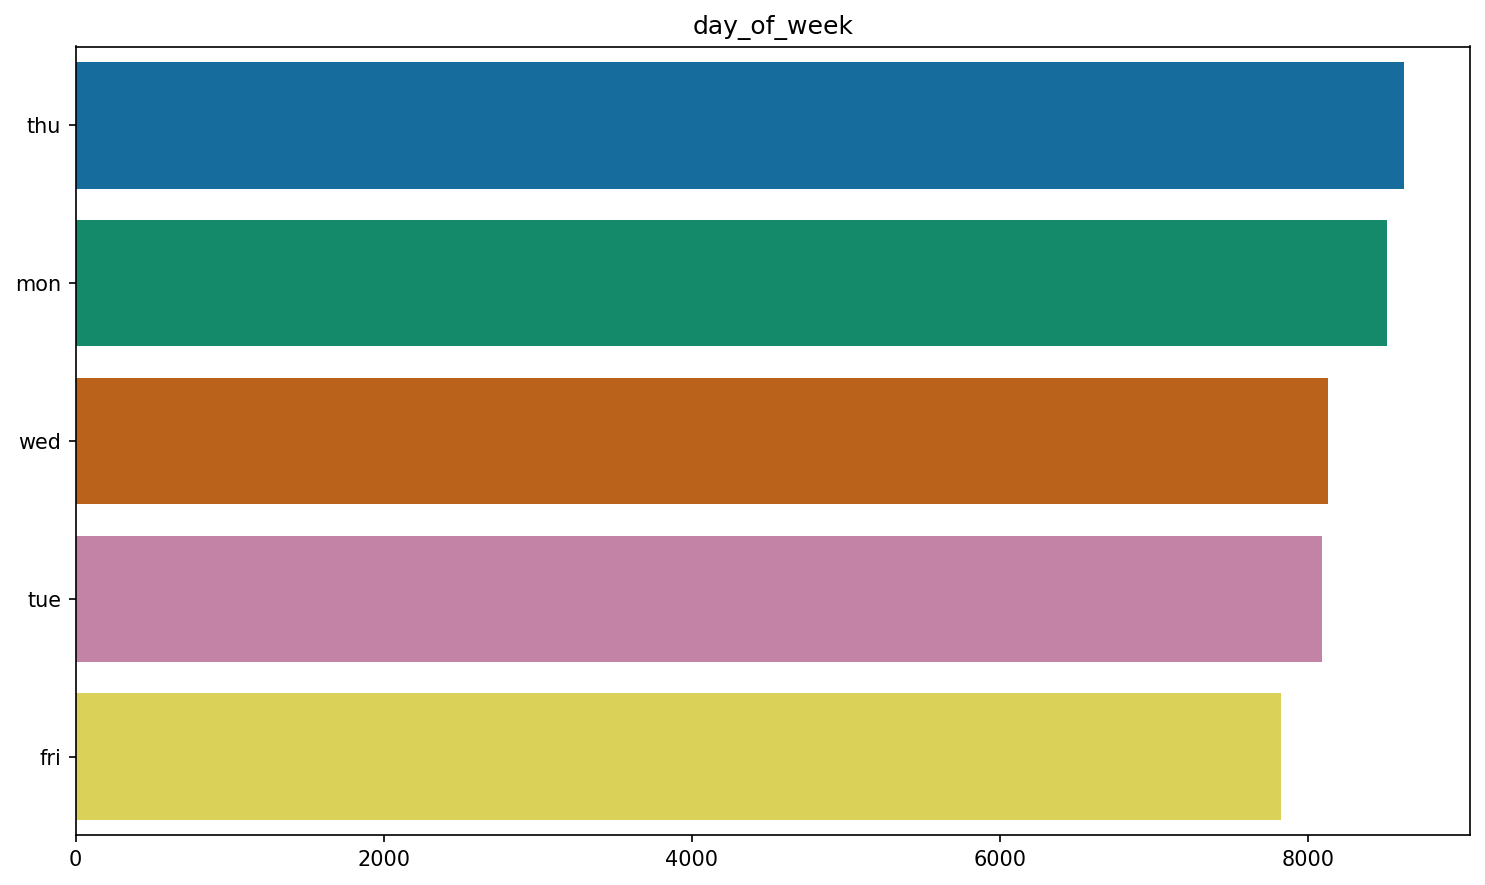

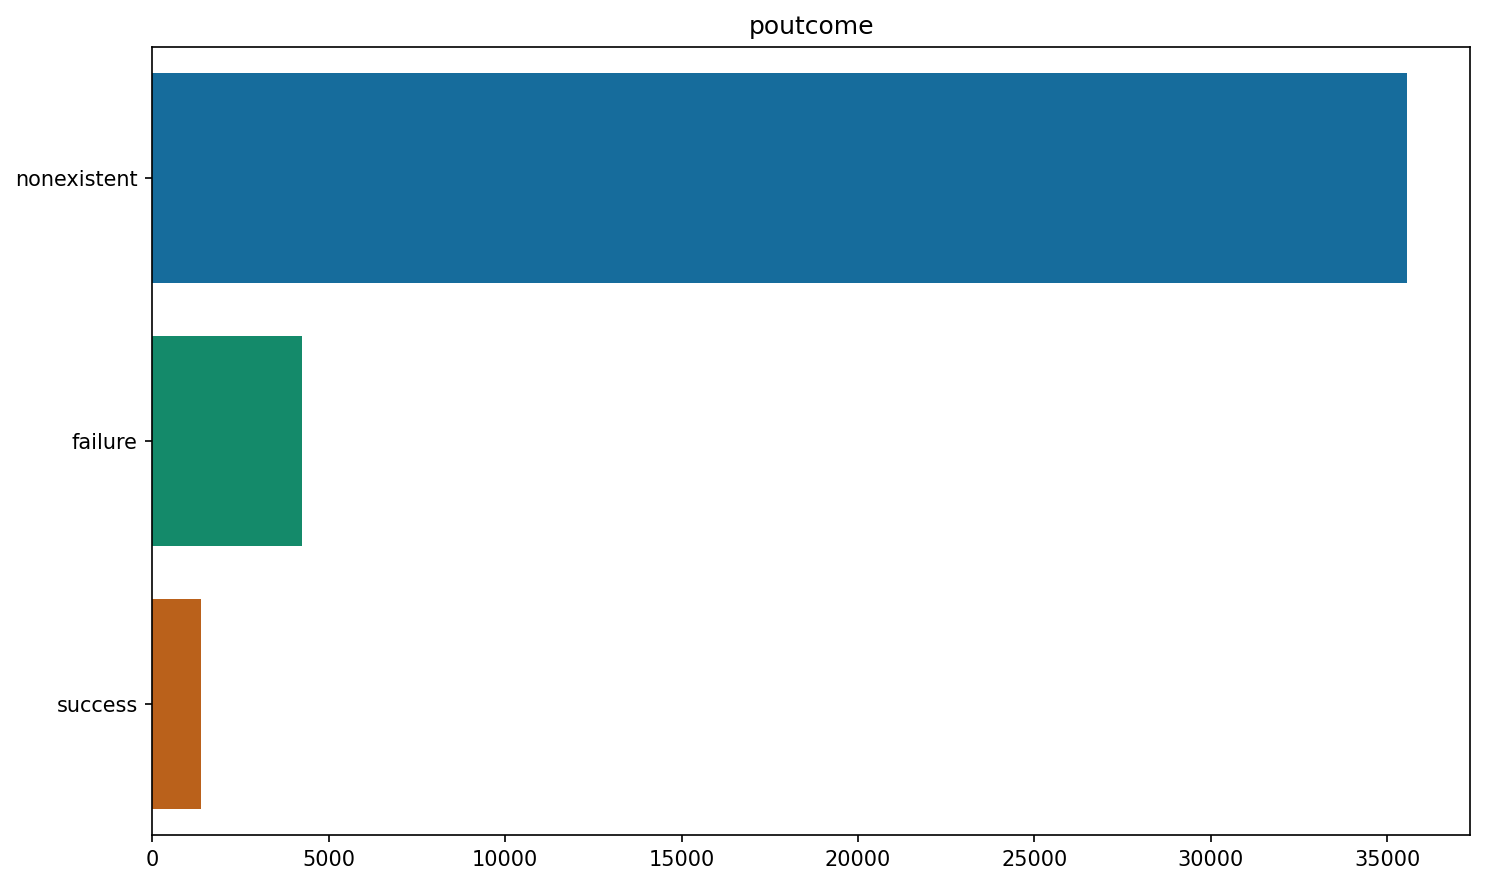

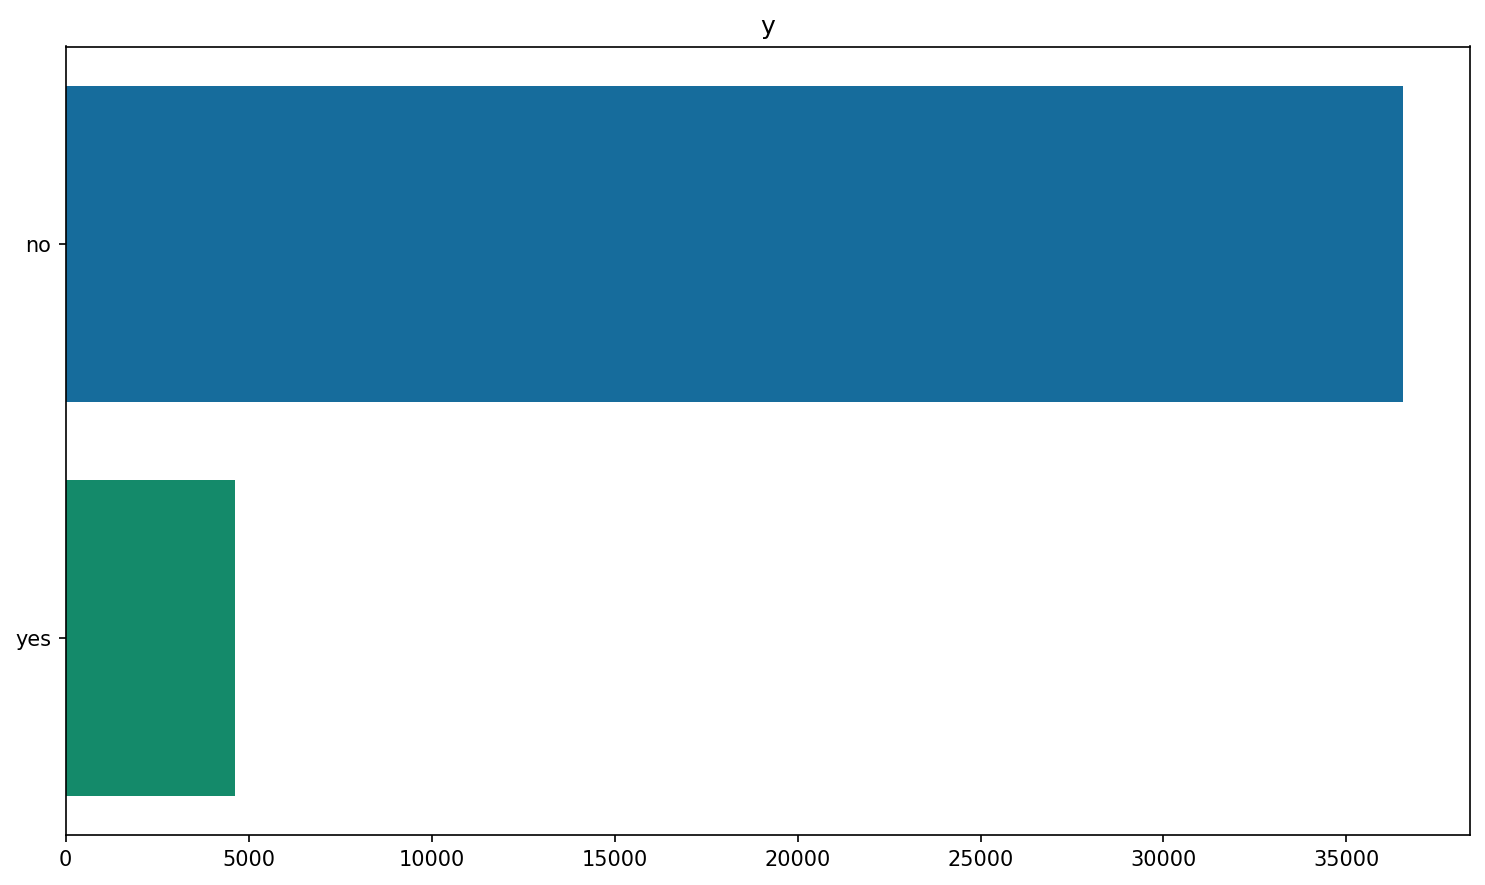

In [16]:
# See what are the categories.
for col in category_cols:
    plt.figure(figsize=(10,6), dpi=150)
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

In [19]:
custum_yes_df = df.loc[df.y == 'yes']
custum_no_df = df.loc[df.y == 'no']

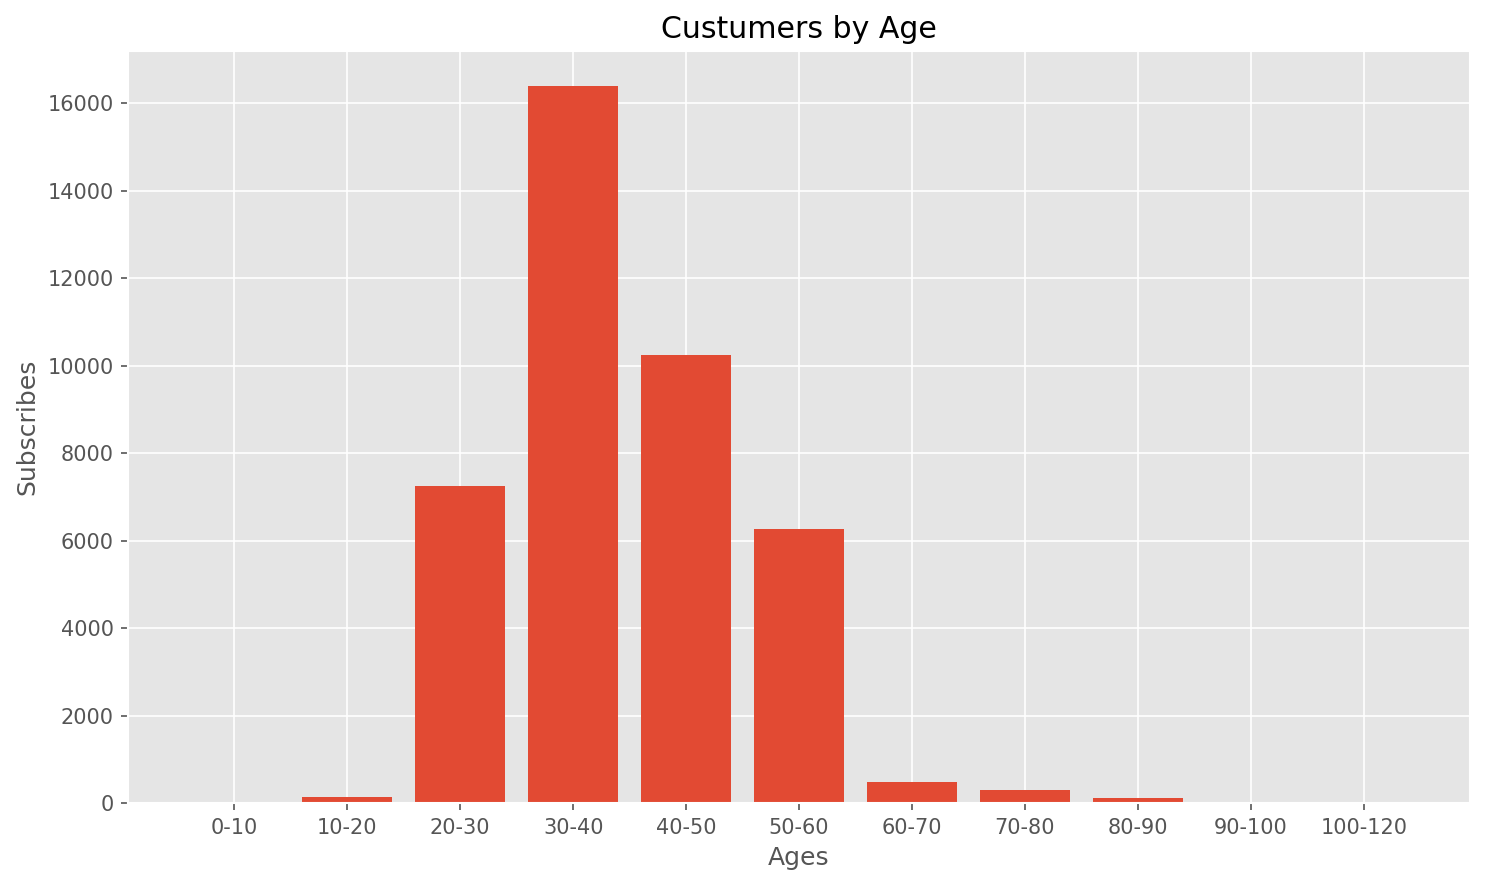

In [20]:
df['bin'] = pd.cut(df['age'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120],
                   labels=['0-10', '10-20','20-30', '30-40', '40-50', '50-60', 
                           '60-70', '70-80', '80-90', '90-100','100-120'])
df['bin'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
plt.style.use('ggplot')
plt.bar(['0-10', '10-20','20-30', '30-40', '40-50', '50-60', '60-70', '70-80', 
         '80-90', '90-100','100-120'], df['bin'].value_counts().sort_index())
ax.set_title('Custumers by Age')
ax.set_xlabel('Ages')
ax.set_ylabel('Subscribes')
plt.tight_layout()

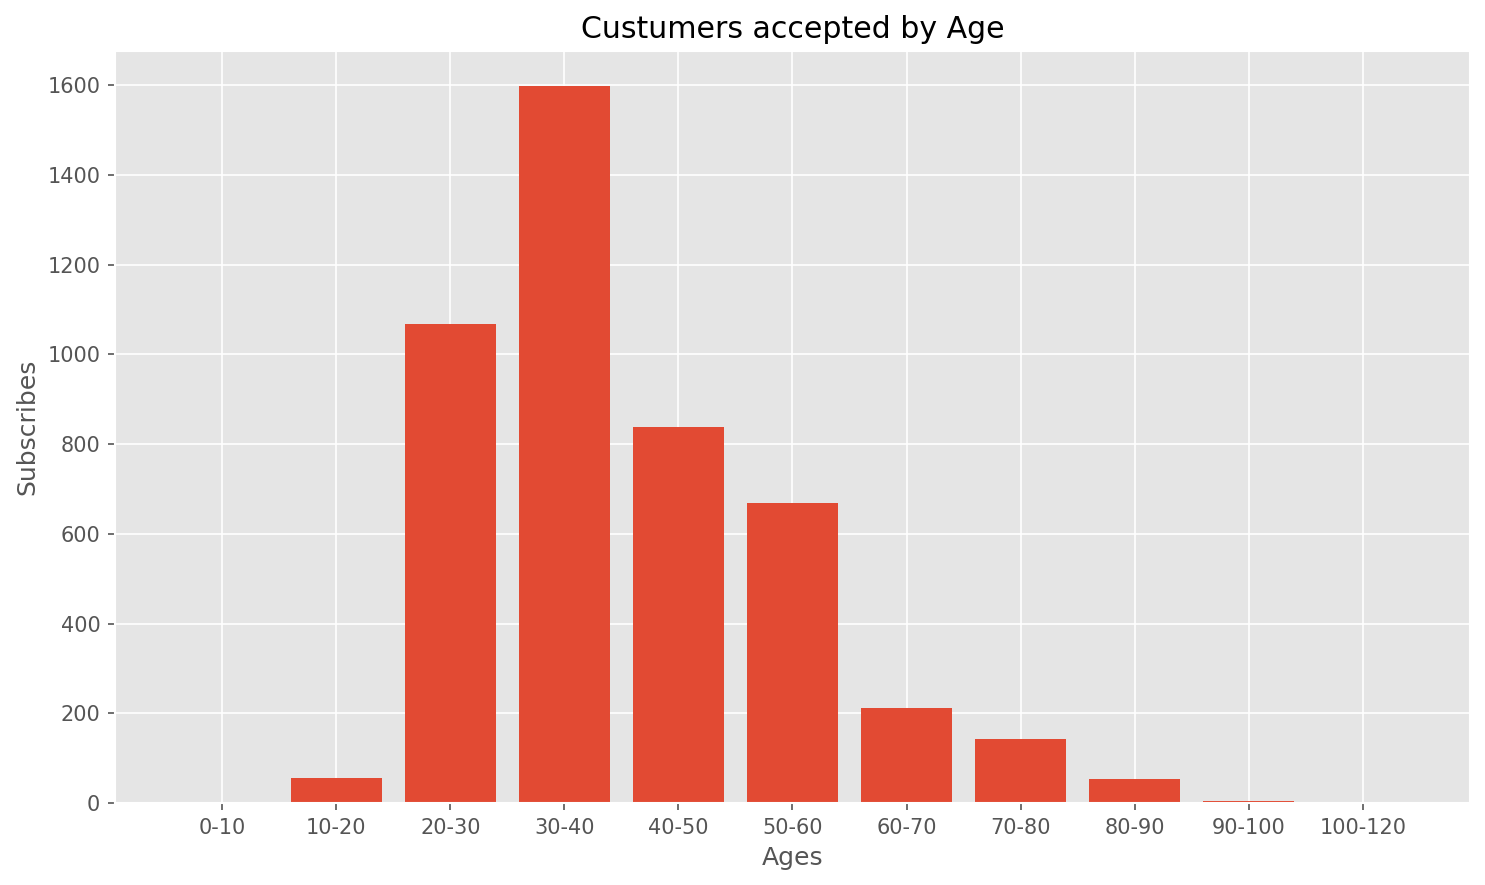

In [21]:
df['bin'] = pd.cut(custum_yes_df.age, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120],
                   labels=['0-10', '10-20','20-30', '30-40', '40-50', '50-60', 
                           '60-70', '70-80', '80-90', '90-100','100-120'])
df['bin'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
plt.style.use('ggplot')
plt.bar(['0-10', '10-20','20-30', '30-40', '40-50', '50-60', '60-70', '70-80', 
         '80-90', '90-100','100-120'], df['bin'].value_counts().sort_index())
ax.set_title('Custumers accepted by Age')
ax.set_xlabel('Ages')
ax.set_ylabel('Subscribes')
plt.tight_layout()

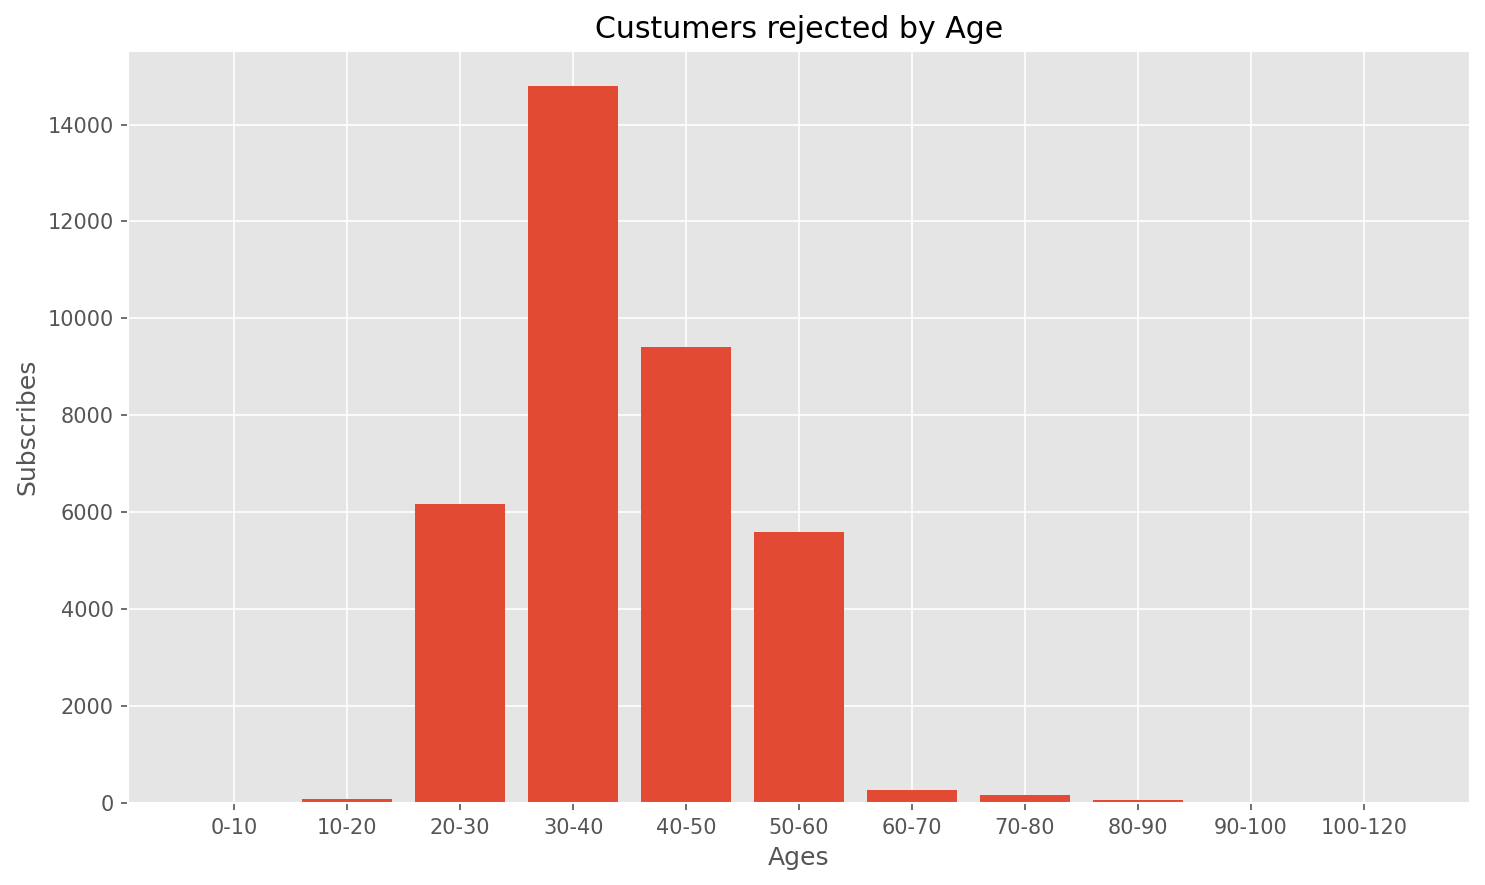

In [22]:
df['bin'] = pd.cut(custum_no_df.age, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120],
                   labels=['0-10', '10-20','20-30', '30-40', '40-50', '50-60', 
                           '60-70', '70-80', '80-90', '90-100','100-120'])
df['bin'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
plt.style.use('ggplot')
plt.bar(['0-10', '10-20','20-30', '30-40', '40-50', '50-60', '60-70', '70-80', 
         '80-90', '90-100','100-120'], df['bin'].value_counts().sort_index())
ax.set_title('Custumers rejected by Age')
ax.set_xlabel('Ages')
ax.set_ylabel('Subscribes')
plt.tight_layout()

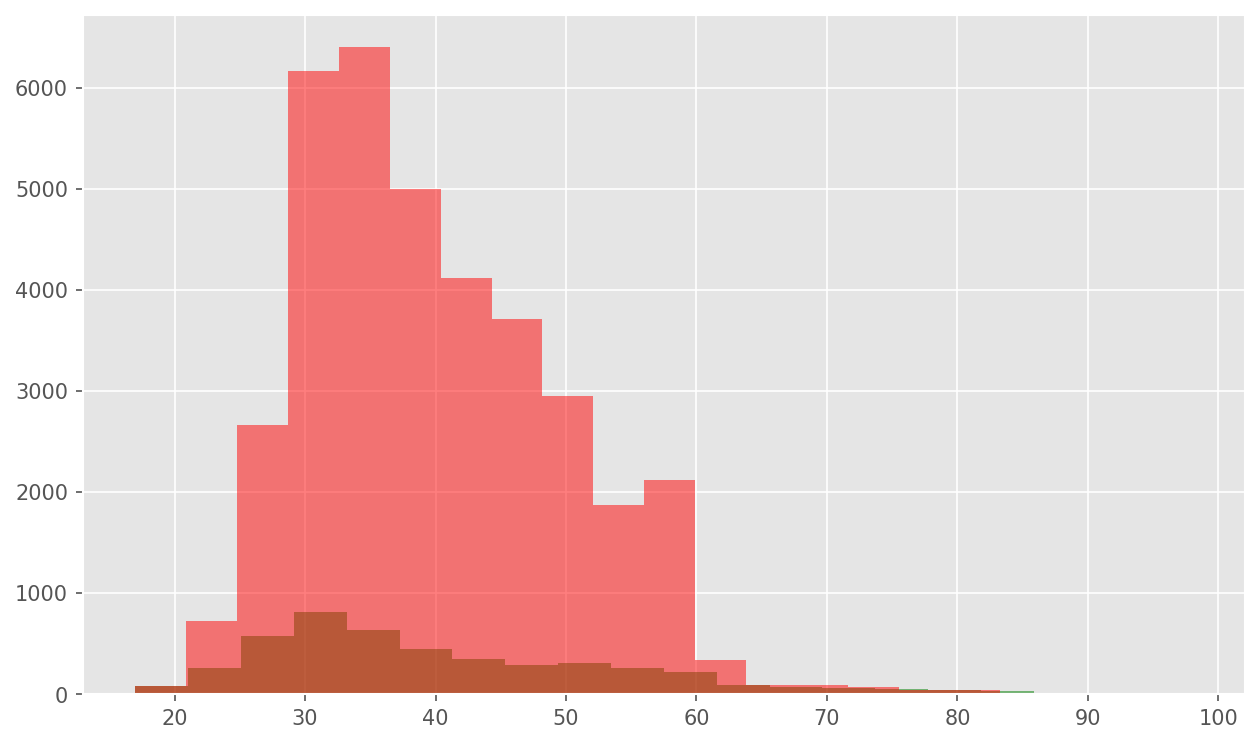

In [23]:
# plot
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
plt.style.use('seaborn-colorblind')
plt.hist(custum_yes_df.age, bins=20, color='g', alpha=0.5)
plt.hist(custum_no_df.age, bins=20, color='r', alpha=0.5)
plt.show()

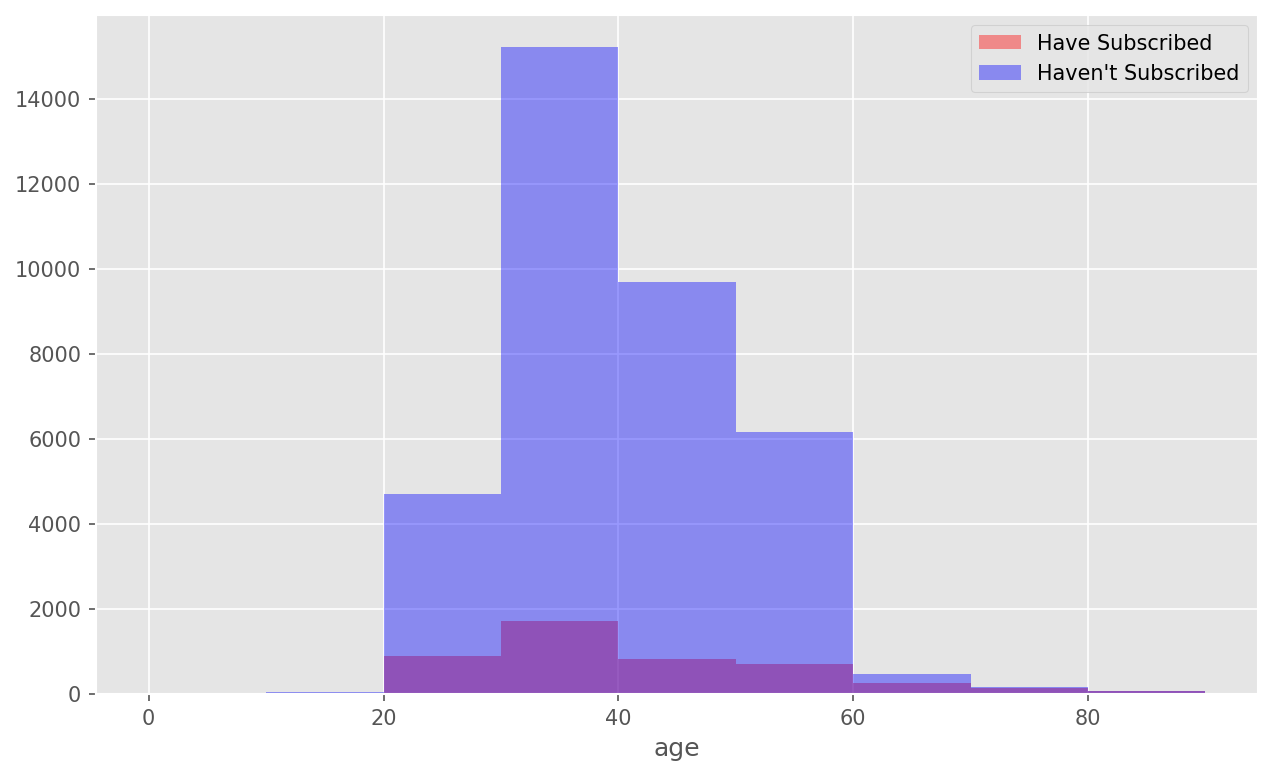

In [24]:
bins = range(0, 100, 10)
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
plt.style.use('seaborn-colorblind')
ax = sns.distplot(df.age[df.y=='yes'],
              color='red', kde=False, bins=bins, label='Have Subscribed')
sns.distplot(df.age[df.y=='no'],
         ax=ax,  # Overplots on first plot
         color='blue', kde=False, bins=bins, label="Haven't Subscribed")
plt.legend()

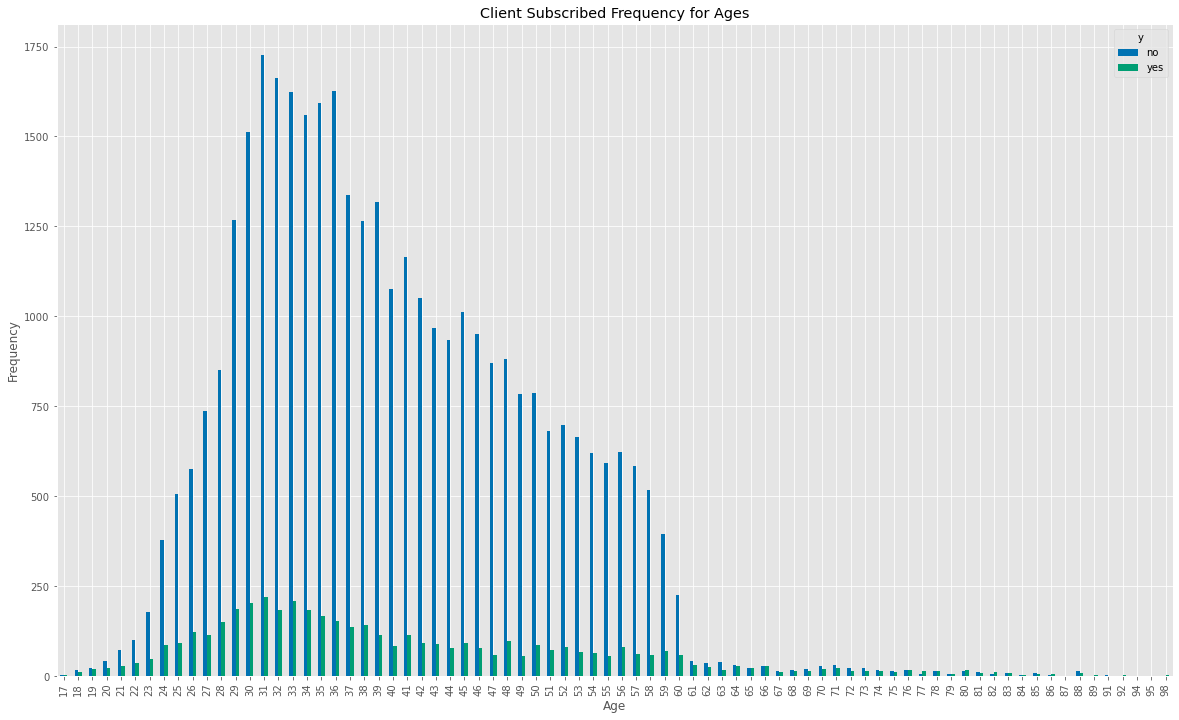

In [25]:
#Age
pd.crosstab(df.age,df.y).plot(kind="bar",figsize=(20,12))
plt.title('Client Subscribed Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_frequency.png', transparent=False)

In [ ]:
# Based on the chart and data above, I decided to test if there two age groups 40-50 and 50-60. 
# It's seems that the difference in subcribing the term deposit is very little and I would like to know
# if it is because of randomness or something else


In [52]:
fifty_yes = pd.cut(custum_yes_df.age, [40, 50], labels=['40-50']).value_counts().sort_index() # 1019

sixty_yes = pd.cut(custum_yes_df.age, [50, 60], labels=['50-60']).value_counts().sort_index() # 811
fifty_no = pd.cut(custum_no_df.age, [40, 50], labels=['40-50']).value_counts() # 10220
sixty_no = pd.cut(custum_no_df.age, [50, 60], labels=['50-60']).value_counts() # 7256

fifty_yes = [1]*1019
fifty_no = [0]*10220
fifty_yes.extend(fifty_no)
total_fifty = fifty_yes
sixty_yes = [1]*811
sixty_no = [0]*7256
sixty_yes.extend(sixty_no)
total_sixty = sixty_yes
total = (1019 + 811 + 10220 + 7256)
total

19306

In [53]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df
df_ = welch_satterhwaithe_df(custum_yes_df.age, custum_no_df.age)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df_))


students = stats.t(df_)
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)


test_statistic = welch_test_statistic(total_fifty, total_sixty)
# print(test_statistic)
p_value = 1 - students.cdf(test_statistic)
print("p-value: {:2.4f}".format(p_value))

Degrees of Freedom for Welch's Test: 5258.58
p-value: 0.9890


In [69]:
shared_sample_freq = (1019 + 811) / total
shared_sample_variance = total * (shared_sample_freq * (1 - shared_sample_freq)) /(len(total_fifty)*len(total_sixty))

difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))
difference_in_proportions

In [68]:
sample_freq_50 = len(fifty_yes) / len(total_fifty)
sample_freq_60 = len(sixty_yes) / len(total_sixty)
difference_in_sample_proportions = sample_freq_50 - sample_freq_60
print("Difference in sample proportions: {:2.2f}".format(difference_in_sample_proportions))

Difference in sample proportions: 0.00


In [71]:
sample_freq_60

1.0

In [64]:
p_value = 1 - difference_in_proportions.cdf(difference_in_sample_proportions)
print("p-value for accepting term deposit frequency comparison: {:2.2f}".format(p_value))

p-value for accepting term deposit frequency comparison: 0.99
